<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [5]:
movies = pd.read_csv("./data/imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [42]:
# Answer: 
movies.shape

(979, 6)

#### Check the data type of each column.

In [43]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [44]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [45]:
movies_duration = movies.sort_values("duration")
movies_duration.head() #shortest movies

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [46]:
movies_duration.tail() #longest movies

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

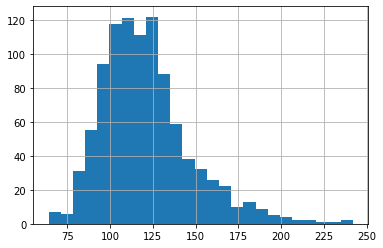

In [47]:
# Answer:
movies.duration.hist(bins = 25);

#### Use a box plot to display that same data.

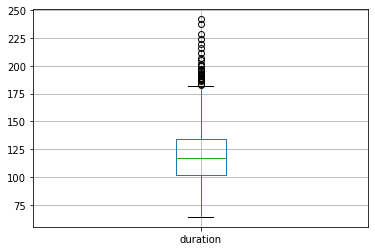

In [48]:
# Answer:
movies.boxplot(column="duration");

## Intermediate level

#### Count how many movies have each of the content ratings.

In [49]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

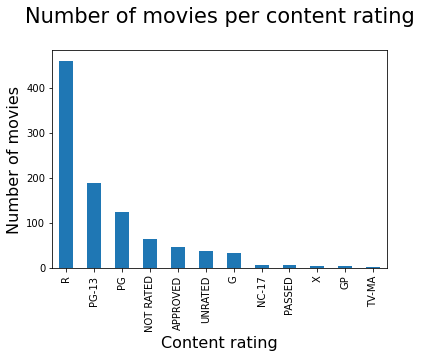

In [50]:
# Answer:
ax = movies.content_rating.value_counts().plot.bar()
ax.set_title("Number of movies per content rating", fontsize = 21, y=1.1)
ax.set_ylabel("Number of movies", fontsize=16)
ax.set_xlabel("Content rating", fontsize = 16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [51]:
# Answer:
movies.content_rating.replace({"NOT RATED": "UNRATED", "APPROVED":"UNRATED", "PASSED":"UNRATED", "GP":"UNRATED"},
                             inplace = True)
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [52]:
# Answer:
movies.content_rating.replace({"X":"NC-17", "TV-MA":"NC-17"}, inplace = True)
movies.tail(10)

,star_rating,title,content_rating,genre,duration,actors_list
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


#### Count the number of missing values in each column.

In [53]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [54]:
# Answer:
NA_data = movies[movies.isna().any(axis=1)] 
NA_data

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [55]:
#Since there are only three missing values, 
#I decided to fill in the missing content_rating NaN values with the correct content_rating found online 

#Butch Cassidy and the Sundance Kid- PG
movies.loc[187, "content_rating"] = "PG"

#Where Eagles Dare- PG
movies.loc[649, "content_rating"] = "PG"

#True Grit- PG-13
movies.loc[936, "content_rating"] = "PG-13"


In [56]:
#check to make sure no more NA values
NA_data = movies[movies.isna().any(axis=1)]
NA_data

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [57]:
# Answer:
over_two = movies[movies["duration"] > 120]  
over_two.star_rating.mean()
#or movies.loc[movies.duration > 120].star_rating.mean()

7.953669724770642

In [58]:
under_two = movies[movies["duration"] < 120] 
under_two.star_rating.mean()
#or movies.loc[movies.duration < 120].star_rating.mean()

7.838666666666665

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [15]:
import matplotlib.pyplot as plt

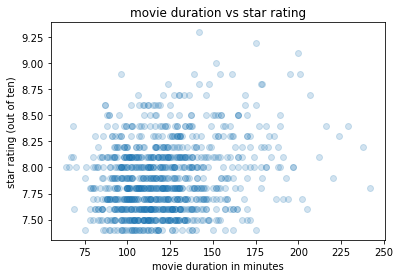

In [19]:
plt.scatter(movies.duration,movies.star_rating, alpha=0.2)
plt.title("movie duration vs star rating")
plt.xlabel("movie duration (in minutes)")
plt.ylabel("star rating (out of ten)");

#### Calculate the average duration for each genre.

In [60]:
# Answer:
movies.groupby("genre").agg({"duration": "mean"})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

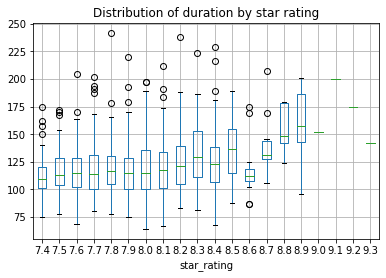

In [61]:
# Answer:
movies.boxplot(column="duration", by="star_rating")
plt.title("Distribution of duration by star rating")
plt.suptitle("");


#### Find the title of the movie with the highest star rating in each genre

In [21]:
# Answer:
highest_rated_movies = movies[movies.groupby("genre")["star_rating"].transform("max") == movies["star_rating"]]
highest_rated_movies[["star_rating", "title", "genre"]].set_index("genre").sort_index()

#a few genres have multiple movies with the same highest rating so I used transform 


,star_rating,title
genre,,
Action,9.0,The Dark Knight
Adventure,8.9,The Lord of the Rings: The Return of the King
Animation,8.6,Spirited Away
Biography,8.9,Schindler's List
Comedy,8.6,Modern Times
Comedy,8.6,City Lights
Comedy,8.6,Life Is Beautiful
Crime,9.3,The Shawshank Redemption
Drama,8.9,12 Angry Men


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [63]:
# Answer:
duplicate_titles = movies[movies.duplicated(subset = ["title"], keep = False)]
print(duplicate_titles)
#not really duplicates just have the same title

     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
703          7.6                          Dracula        UNRATED     Horror   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit          PG-13  Adventure   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
678       158  [u'Hu

In [64]:
# or 
movies.loc[movies.title.duplicated(keep=False), :]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [65]:
# Answer:
genres_over_ten = ['Crime', 'Action', 'Drama', 'Adventure', 'Biography', 'Comedy', 'Animation', 'Mystery', 'Horror'] #create list of genres over ten
list_of_movies = movies.loc[movies['genre'].isin(genres_over_ten)] #get list of movies where genre is in the list genres_over_ten
list_of_movies.groupby(["genre"]).mean().drop("duration", axis=1)  #grouby genre, get mean of star_rating, and drop duration

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [66]:
# Answer:
genre_counts = movies.genre.value_counts() #save value counts
list_of_movies = movies[movies['genre'].map(genre_counts) >= 10] #filter movies based on value counts >= 10
list_of_movies.groupby(["genre"]).mean().drop("duration", axis=1) #grouby genre, get mean of star_rating, and drop duration


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [67]:
# Answer:
average_star_rating = movies.groupby('genre').star_rating.mean() #group by genre,and find star_rating mean
average_star_rating[movies.genre.value_counts() >= 10] #use boolean Series to index out value counts of genre >= 10

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [105]:
# Answer:
aggegated_genre = movies.groupby("genre").agg({"genre": "count", "star_rating" : "mean"}) #groupby genre and aggregate genre count and star_rating mean
aggegated_genre[aggegated_genre["genre"] >= 10] #filter the genres by those >= 10 for the count

,genre,star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [221]:
movies = pd.read_csv("./data/imdb_1000.csv")

In [222]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [223]:
movies.actors_list = movies.actors_list.apply(lambda x: x.replace("[","").replace("]","").replace("u'","").replace("'",""))

In [224]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson"


In [225]:
#split the strings
actors_list = movies.actors_list.str.split(", ")
actors_list

0              [Tim Robbins, Morgan Freeman, Bob Gunton]
1                 [Marlon Brando, Al Pacino, James Caan]
2             [Al Pacino, Robert De Niro, Robert Duvall]
3          [Christian Bale, Heath Ledger, Aaron Eckhart]
4        [John Travolta, Uma Thurman, Samuel L. Jackson]
                             ...                        
974           [Dustin Hoffman, Jessica Lange, Teri Garr]
975    [Michael J. Fox, Christopher Lloyd, Mary Steen...
976            [Russell Crowe, Paul Bettany, Billy Boyd]
977    [JoBeth Williams, u"Heather ORourke", Craig T....
978       [Charlie Sheen, Michael Douglas, Tamara Tunie]
Name: actors_list, Length: 979, dtype: object

In [226]:
#append each string into a new list
list_of_actors = []
for actor in actors_list:
    list_of_actors.append(actor)

In [227]:
#checking to see if actors appended
list_of_actors[0:10] 

[['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'],
 ['Marlon Brando', 'Al Pacino', 'James Caan'],
 ['Al Pacino', 'Robert De Niro', 'Robert Duvall'],
 ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart'],
 ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson'],
 ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'],
 ['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef'],
 ['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen'],
 ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley'],
 ['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']]

In [228]:
#split nested list
final_list_of_actors = [j for i in list_of_actors for j in i]
final_list_of_actors[0:10]

['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Al Pacino',
 'Robert De Niro',
 'Robert Duvall',
 'Christian Bale']

In [245]:
#dictionary giving the number of times each actor appears in all of the movies in the IMBD list
dictionary_of_actors = dict((x,final_list_of_actors.count(x)) for x in set(final_list_of_actors))
dictionary_of_actors

{'Ben Affleck': 4,
 'Rupert Graves': 1,
 'Julian Sands': 1,
 'Debbie Reynolds': 1,
 'Larry Gates': 1,
 'Carla Gugino': 1,
 'Sh\\xfbichir\\xf4 Moriyama': 1,
 'Nicole Kidman': 4,
 'Halle Berry': 2,
 'Djimon Hounso': 2,
 'Albert Finney': 2,
 'Clifton Collins Jr.': 1,
 'Aidan Quinn': 1,
 'Tobey Maguire': 4,
 'Konstantin Lavronenko': 1,
 'Geoffrey Arend': 1,
 'Michael Preston': 1,
 'Kieran Culkin': 1,
 'Leandro Firmino': 1,
 'Markus Rygaard': 1,
 'Daniel Br\\xfchl': 2,
 'Paulette Goddard': 2,
 'Rutger Hauer': 1,
 'Robert Prosky': 1,
 'Lauren Bacall': 3,
 'Norma Crane': 1,
 'Gert Fr\\xf6be': 1,
 'Victor Buono': 1,
 'Natalie Portman': 5,
 'Sophie N\\xe9lisse': 1,
 'Shelley Duvall': 1,
 'Dev Patel': 1,
 'Carrie Henn': 1,
 'Carrie Fisher': 4,
 'Lionel Barrymore': 1,
 'Fernanda Montenegro': 1,
 'Paddy Considine': 1,
 'Anne Francis': 1,
 'Janusz Gajos': 1,
 'Marianna Hill': 1,
 'Heather Langenkamp': 1,
 'Wilford Brimley': 1,
 'Helen Hunt': 2,
 'June Squibb': 1,
 'Fr\\xe9d\\xe9rique Feder': 1,
 'u

In [246]:
!git add .
!git commit -m "attempt at bonus"
!git push

[master 7ce01b5] attempt at bonus
 1 file changed, 56 insertions(+), 33 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 717 bytes | 717.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://git.generalassemb.ly/fachiappetta/unit2_project.git
   302a1d9..7ce01b5  master -> master
